# Cross-validation for parameter tuning, model selection, and feature selection

Full tutorial [here](https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb)

In [2]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# read in the iris data
iris = load_iris()
features = iris.data
labels = iris.target

### K-fold cross-validation

1. Split dataset into K equal parts (or "folds").
2. Use fold 1 as the testing set and the union* of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

*Union means all the unique values in all folds [1,2,3] U [3,4,5] == [1,2,3,4,5]

In [3]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


### Parameter Tuning

What is the optimal value of K in KNN?

In [9]:

from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation with K=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, features, labels, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
scores.mean()

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


0.96666666666666679

In [12]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features, labels, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
#Return the index of the max score
print(k_scores.index(max(k_scores)))

12


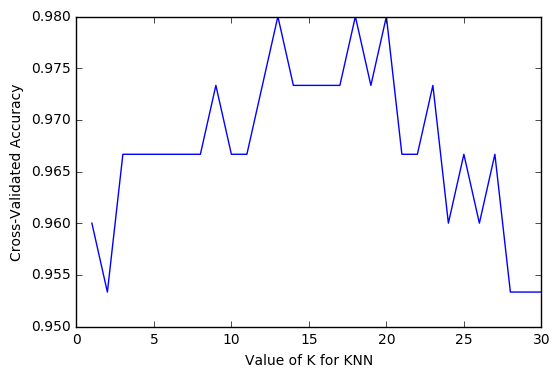

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Model Selection

Should I use KNN or Logistic Regression?

In [14]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=13)
print(cross_val_score(knn, features, labels, cv=10, scoring='accuracy').mean())

0.98


In [15]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, features, labels, cv=10, scoring='accuracy').mean())

0.953333333333


### Feature Selection

Should Newspaper be included in the Linear Regression model?

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
lm = LinearRegression()

labels = data['Sales']

In [38]:
# 10-fold cross-validation with all features
features = data[['TV', 'Radio', 'Newspaper']]
print(np.sqrt(-cross_val_score(lm, features, labels, cv=10, scoring='mean_squared_error')).mean())

1.69135317081


In [39]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
features = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, features, labels, cv=10, scoring='mean_squared_error')).mean())

1.67967484191


### Ways To Improve Cross-Validation?


**Repeated cross-validation**
Repeat cross-validation multiple times (generating unique random folds each time) and average the results

**Creating a hold-out set**
"Hold out" a portion of the data before beginning the model building process
Locate the best model using cross-validation on the remaining data, and test it using the hold-out set